In [2]:
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
import os
import numpy as np
np.seterr(invalid='ignore')
from PPP import PPP
from defense_PPP import defense_PPP
from court import create_court
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import plotly.graph_objects as go
pd.options.display.max_columns = 999
from get_stats import get_stats

game = '11.22.23_Magic'
total = '!season_totals'
opponent = game[9:]

d:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


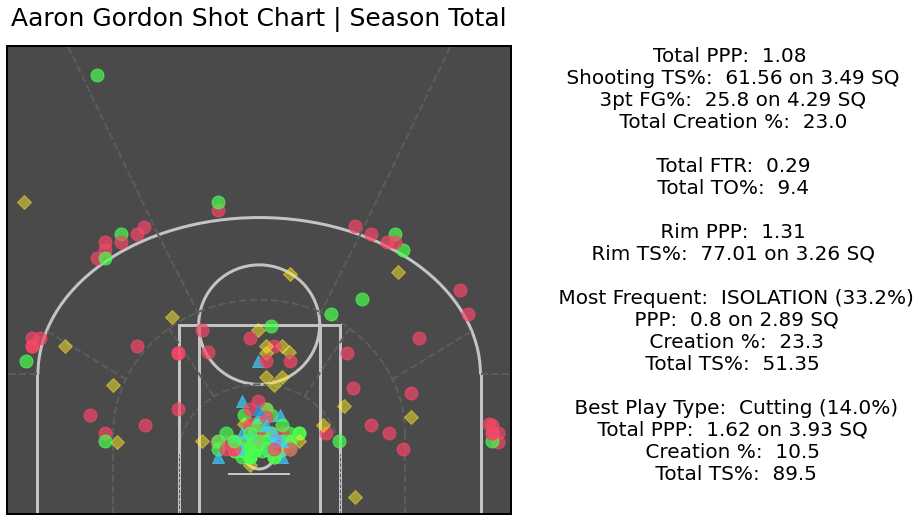

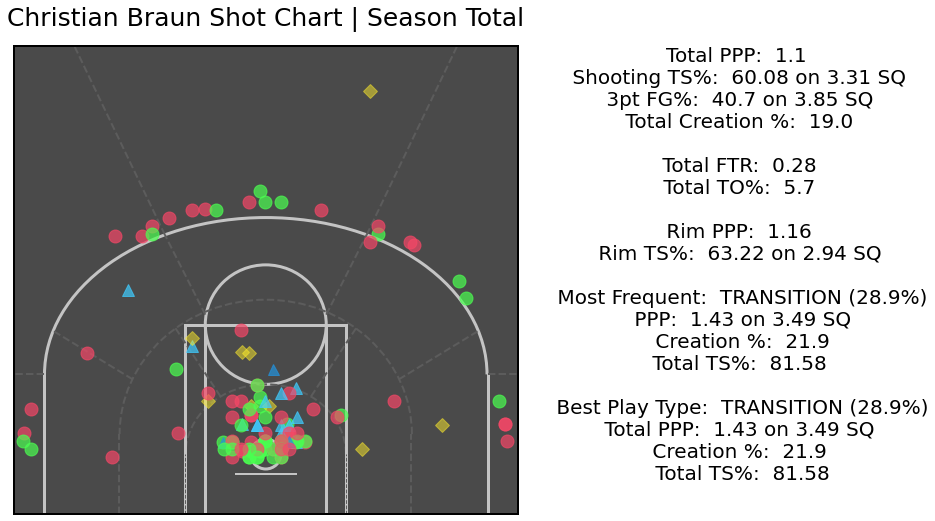

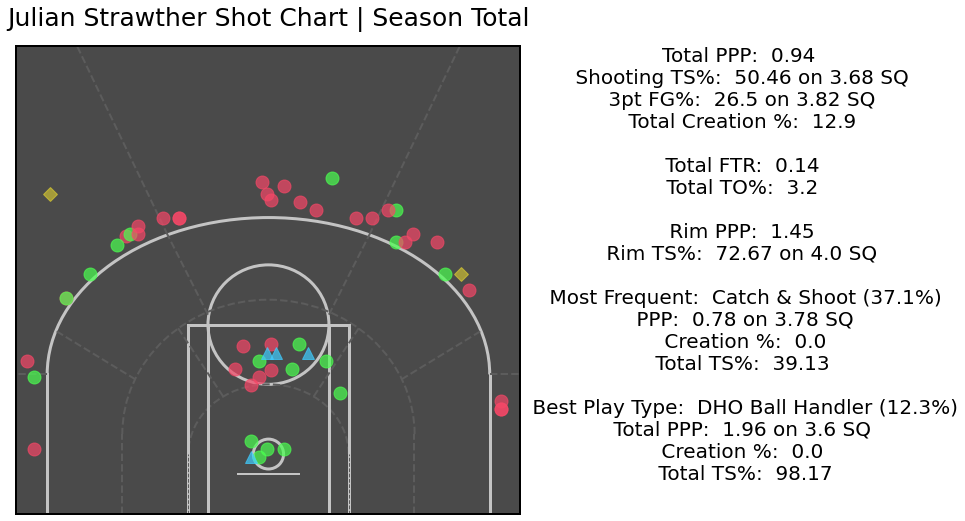

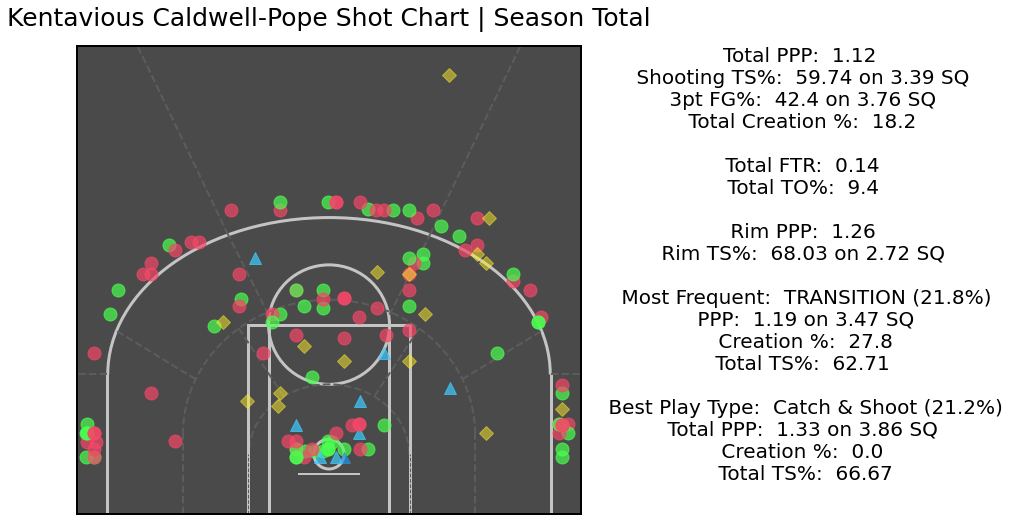

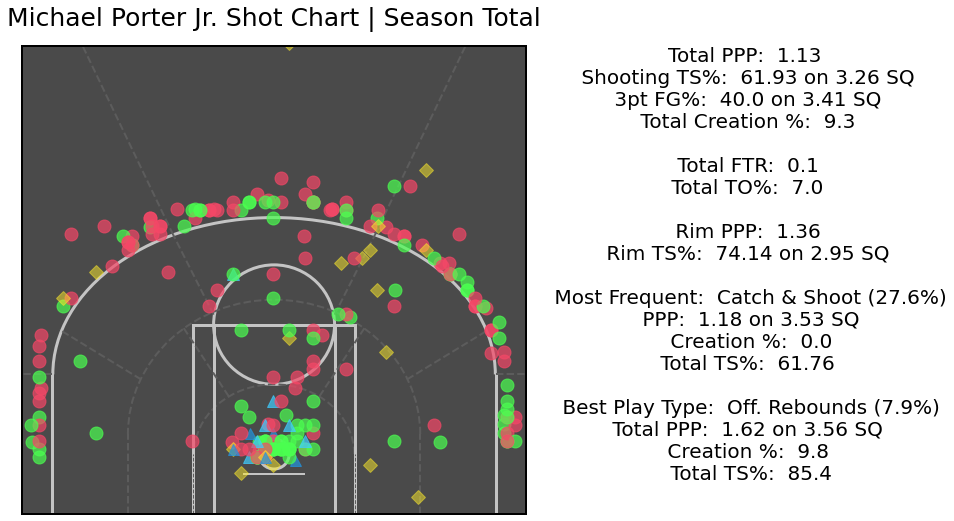

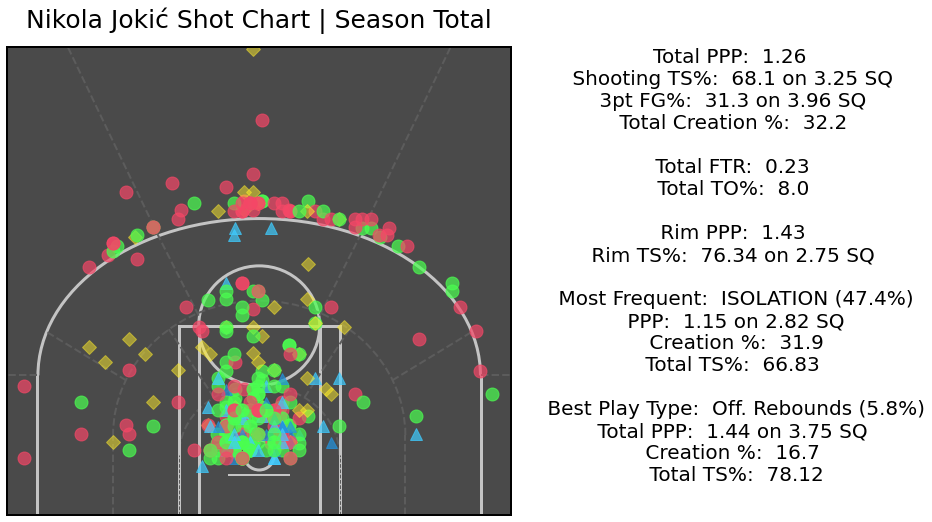

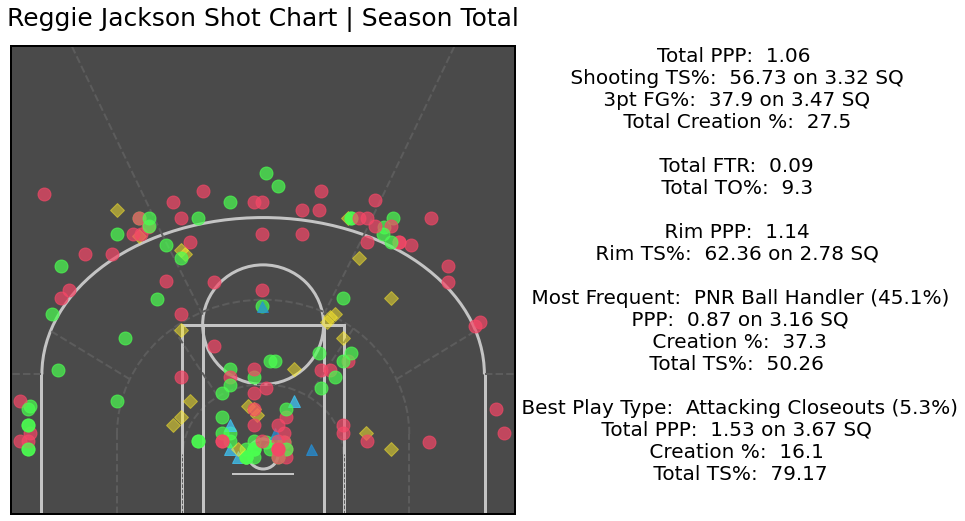

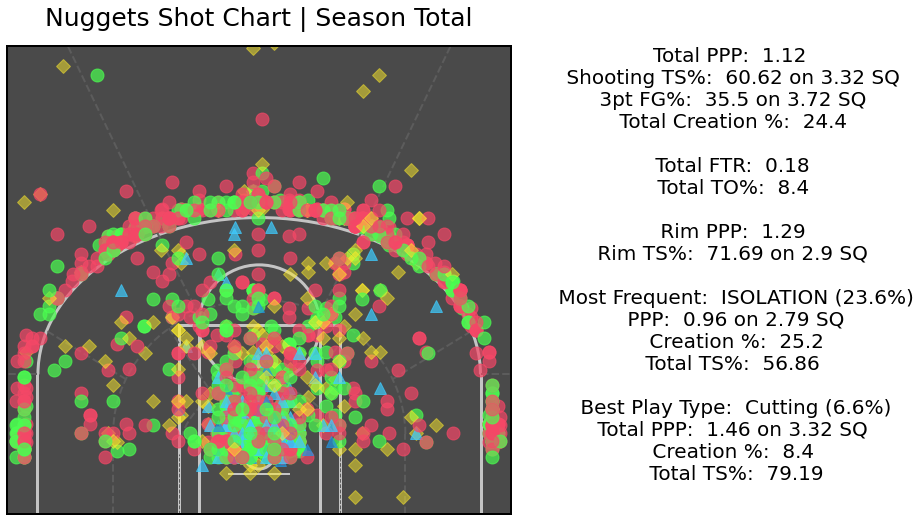

In [11]:
total_folder = 'Nuggets/!season_totals'
game_dir = f'data/{game}/Nuggets/Offense'

players = []
for subdir, dirs, files in os.walk(game_dir):
    for file in files:
        if file[-5:] == '.json':
            player = file[:-5]
            players.append(player)

for player in players:
    if player[-10:] != 'checkpoint':
        if player not in  ['Jalen Pickett', 'Peyton Watson', 'Zeke Nnaji']:
            get_stats('Nuggets', player, total, 'Offense', save=True)

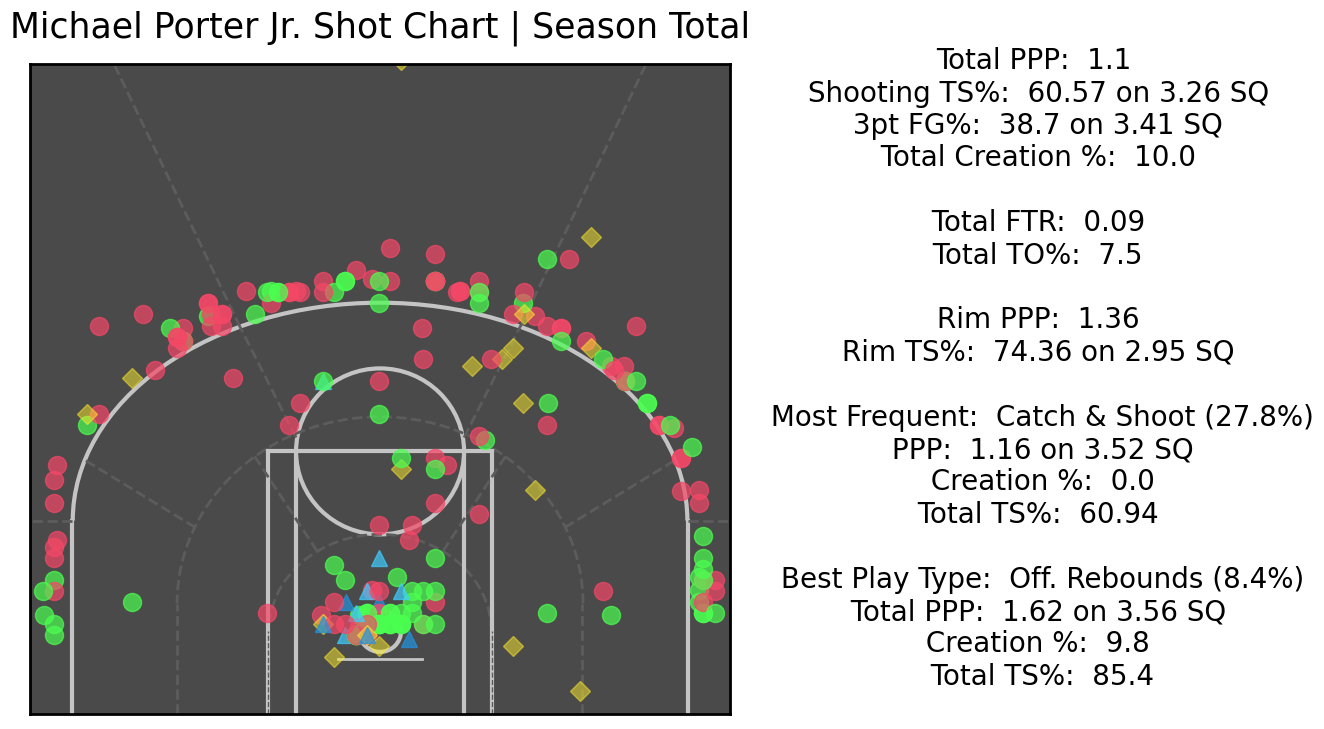

In [6]:
PPP_data, rim_PPP, nugg_off_fig = get_stats('Nuggets', 'Michael Porter Jr.', total, 'Offense')

In [11]:
best = PPP_data.copy()
best = best[best['Total PPP'] != 'N/A']
best['% of Poss.'] = best['% of Poss.'].astype('float')
best = best[best['% of Poss.'] > 5.0]
best = best.sort_values('Total PPP', ascending=False).drop('TOTAL').reset_index()
best

,index,Total PPP,% of Poss.,Total TO,Total Creation %,Total FTR,Total TS%,Total SQ,Total 2pt FGA,Total 2pt FG%,Total 2pt SQ,Total 3pt FGA,Total 3pt FG%,Total 3pt SQ,Shooting PPP,% of Shooting Poss.,Shooting TO,Shooting Freq.,Shooting FTR,Shooting TS%,Shooting SQ,Shooting 2pt Poss.,Shooting 2pt FG%,Shooting 2pt SQ,Shooting 3pt Poss.,Shooting 3pt FG%,Shooting 3pt SQ,Creation PPP,% of Creation Poss.,Creation TO,Creation %,Creation FTR,Creation TS%,Creation SQ,Creation 2pt Poss.,Creation 2pt FG%,Creation 2pt SQ,Creation 3pt Poss.,Creation 3pt FG%,Creation 3pt SQ
0,TRANSITION,1.24,12.2,3,57.8,0.19,70.3,4.38,11,100.0,4.27,10,20.0,4.5,1.38,7.0,3,42.2,0.29,95.18,3.71,7,100.0,3.8,3,50.0,3.5,1.14,26.1,0,57.8,0.14,57.12,4.71,6,100.0,4.67,8,12.5,3.5
1,Catch & Shoot,1.22,12.7,0,0.0,0.0,61.11,3.63,0,N/A,N/A,27,40.7,3.63,1.22,17.4,0,100.0,0.0,61.11,3.63,0,N/A,N/A,27,40.7,3.63,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,3.63
2,PNR Ball Handler,0.87,46.4,12,36.2,0.12,50.28,3.16,54,55.6,2.8,28,21.4,3.86,0.72,40.5,12,63.8,0.08,44.71,2.92,52,51.2,2.78,10,0.0,3.62,1.15,62.5,0,36.2,0.18,58.24,3.52,15,69.2,2.85,20,30.0,3.62
3,ISOLATION,0.64,14.1,3,16.7,0.08,35.34,2.77,16,43.8,2.88,10,10.0,2.6,0.56,16.1,3,83.3,0.1,31.99,2.57,18,40.0,2.87,6,0.0,1.83,1.0,8.8,0,16.7,0.0,50.0,3.6,1,100.0,3.0,4,25.0,1.83


C:\Users\nickd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


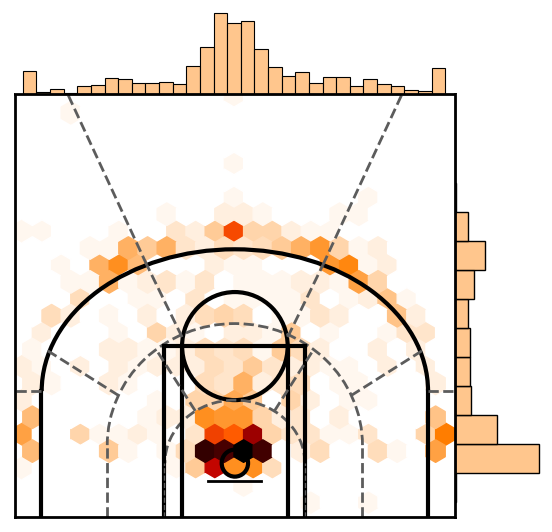

In [37]:
path = f'data/!season_totals/Nuggets/Offense/Team.json'

with open (path, 'r') as o:
    offense_file = json.load(o)
    
shots_x = [shot[0][0] for shot in offense_file['ovr_data']['shooting_locations']]
shots_y = [shot[0][1] + 60 for shot in offense_file['ovr_data']['shooting_locations']]
shots_results = [shot[1] for shot in offense_file['ovr_data']['shooting_locations']]

shots_df = pd.DataFrame(columns=['LOC_X', 'LOC_Y', 'RESULT'])
shots_df['LOC_X'] = shots_x
shots_df['LOC_Y'] = shots_y
shots_df['RESULT'] = shots_results

cmap=plt.cm.gist_heat_r

joint_shot_chart = sns.jointplot(shots_df.LOC_X, shots_df.LOC_Y,
                                 kind='hex', space=0, color=cmap(.15), cmap=cmap)

joint_shot_chart.fig.set_size_inches(7,6.5)

ax = joint_shot_chart.ax_joint
create_court(ax, 'black')

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

#ax.set_title("Nuggets FGA's 2023-24", y=1.2, fontsize=18)